In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy import optimize
data_filename = 'Hyperfine.txt'
using_colab = False
np.set_printoptions(threshold=sys.maxsize)

Text(0, 0.5, 'Voltage (V)')

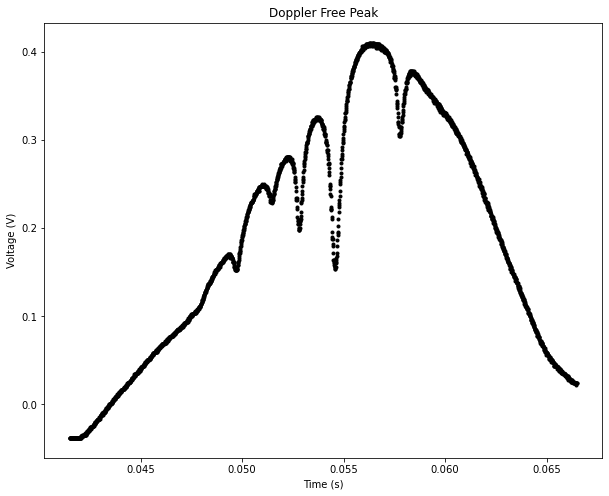

In [3]:
x, y= np.loadtxt(data_filename, unpack=True, skiprows=1)
fig, ax = plt.subplots(figsize = (10,8))
ax.errorbar(x,y,fmt='k.')
ax.set_title('Doppler Free Peak')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')

In [4]:
data_filename = 'Doppler Broadening Peak.txt'

Text(0, 0.5, 'Voltage (V)')

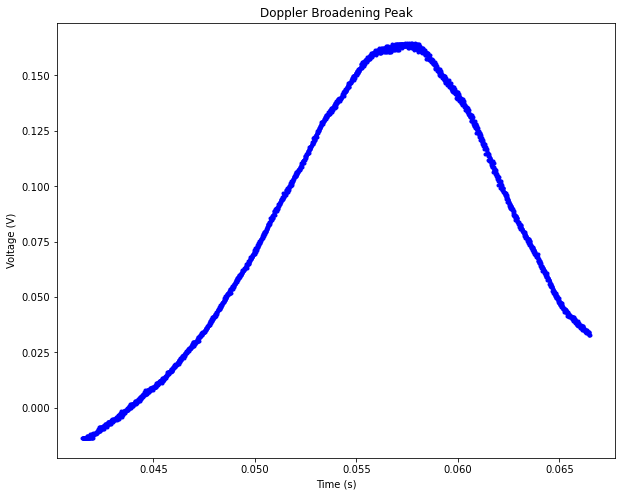

In [5]:
u, z= np.loadtxt(data_filename, unpack=True, skiprows=1)
fig, ax = plt.subplots(figsize = (10,8))
ax.errorbar(u,z,fmt='b.')
ax.set_title('Doppler Broadening Peak')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')

2.5790300596370512


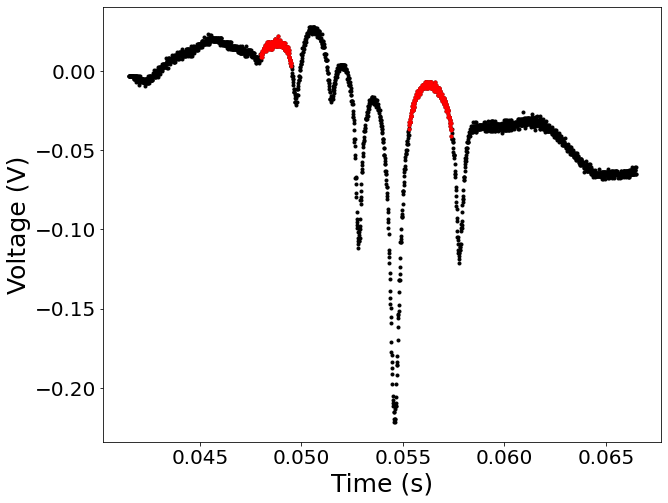

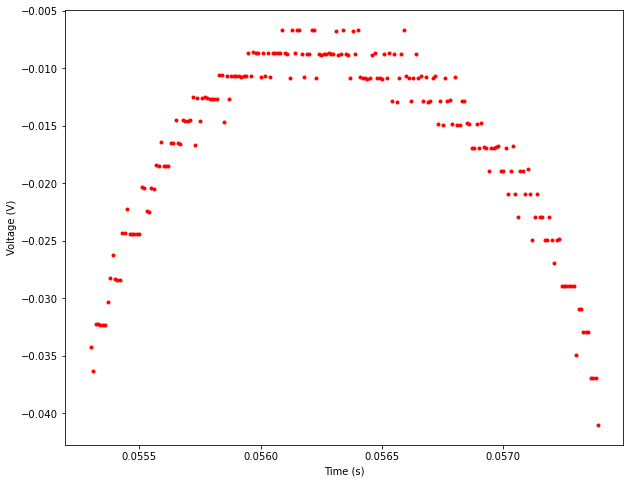

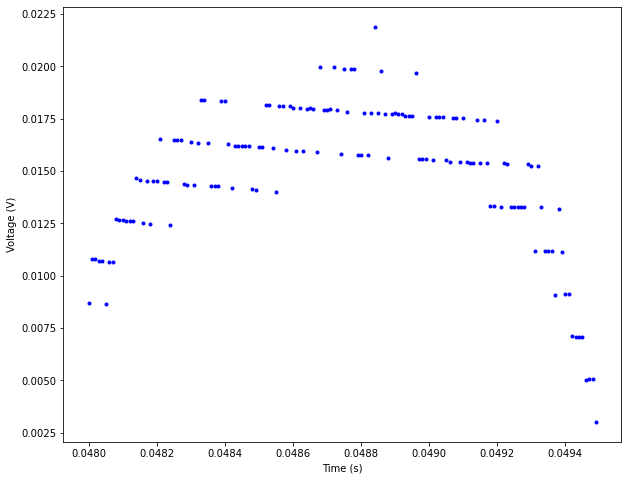

In [32]:
factor=((0.0096/0.04)+(0.0184/0.066)+(0.164/0.404)+(0.028/0.088)+(0.033/0.1416)+(0.1528/0.36)+(0.0472/0.058))/7
print(1/factor)
sub=y-(z/factor)

fig, ax = plt.subplots(figsize = (10,8))
ax.errorbar(x,sub,fmt='k.')
ax.set_xlabel('Time (s)',fontsize=25)
ax.set_ylabel('Voltage (V)',fontsize=25)

min_value=1380
max_value=1590
min_value2=650
max_value2=800
fig,ay=plt.subplots(figsize=(10,8))
ax.errorbar(x[min_value:max_value],sub[min_value:max_value],fmt='r.')
ax.errorbar(x[min_value2:max_value2],sub[min_value2:max_value2],fmt='r.')

ay.errorbar(x[min_value:max_value],sub[min_value:max_value],fmt='r.')
ay.set_xlabel('Time (s)')
ay.set_ylabel('Voltage (V)')

fig,az=plt.subplots(figsize=(10,8))
az.errorbar(x[min_value2:max_value2],sub[min_value2:max_value2],fmt='b.')
az.set_xlabel('Time (s)')
az.set_ylabel('Voltage (V)')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)


550
700
Lorentzian Fit

Converged with chi-squared 12.00
Number of degrees of freedom, dof = 145.00
Reduced chi-squared 0.08

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 6.690e-06                | 2.823e-06               
1           | 4.970e-02                | 4.786e-02                | 3.581e-05               
2           | -1.000e-01               | -2.384e-04               | 8.459e-05               
3           | 1.000e-01                | 3.394e+00                | 1.196e+00               
4           | 1.000e-01                | -1.467e-01               | 5.657e-02               


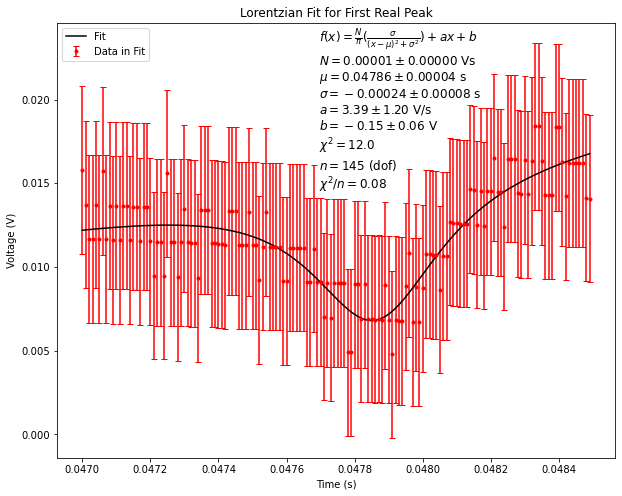

In [30]:
import pandas as pd
data = x,sub
min_value=550
max_value=700
print(min_value)
print(max_value)
dsub = 0.005

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0,np.zeros_like(p0),-1,-1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf),-1,-1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(abs(np.diagonal(cov))) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof


time2=x[min_value:max_value]
sub2=sub[min_value:max_value]

def lorentzianfunc(p,x):
    return (p[0]/sc.pi)*(p[2]/(((x-p[1])**2)+p[2]**2))+p[3]*x+p[4]

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

print("Lorentzian Fit")
p0=[1.,0.0497,-.1,0.1,.1]

pf1,pferr1,chisq1,dof1=data_fit(p0,lorentzianfunc,time2,sub2,dsub)

fig,ax=plt.subplots(figsize=(10,8))
ax.errorbar(time2,sub2,yerr=dsub,fmt='r.',label='Data in Fit',capsize=3)
time_cont=np.linspace(min(time2),max(time2),5000)
ax.plot(time_cont,lorentzianfunc(pf1,time_cont),'k-',label='Fit')

textfit=r'$f(x) = \frac{N}{\pi}(\frac{\sigma}{(x-\mu)^2+\sigma^2})+ax+b$'+'\n'
textfit+='$N={:.5f}\pm{:.5f}$ Vs\n'.format(pf1[0],pferr1[0])
textfit+='$\mu={:.5f}\pm{:.5f}$ s\n'.format(pf1[1],pferr1[1])
textfit+='$\sigma={:.5f}\pm{:.5f}$ s\n'.format(pf1[2],pferr1[2])
textfit+='$a={:.2f}\pm{:.2f}$ V/s\n'.format(pf1[3],pferr1[3])
textfit+='$b={:.2f}\pm{:.2f}$ V\n'.format(pf1[4],pferr1[4])
textfit += '$\chi^2= {:.1f}$ \n'.format(chisq1) 
textfit += '$n = {}$ (dof) \n'.format(dof1) 
textfit += '$\chi^2/n = {:.2f}$'.format(chisq1/dof1)


ax.text(0.47,0.99,textfit,transform=ax.transAxes,fontsize=12,verticalalignment='top')
ax.set_title("Lorentzian Fit for First Real Peak")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.legend()


750
900
Lorentzian Fit

Converged with chi-squared 13.87
Number of degrees of freedom, dof = 145.00
Reduced chi-squared 0.10

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 3.205e-05                | 2.556e-06               
1           | 4.970e-02                | 4.974e-02                | 7.088e-06               
2           | -1.000e-01               | -2.332e-04               | 1.625e-05               
3           | 1.000e-01                | 6.569e+00                | 1.071e+00               
4           | 1.000e-01                | -3.010e-01               | 5.332e-02               


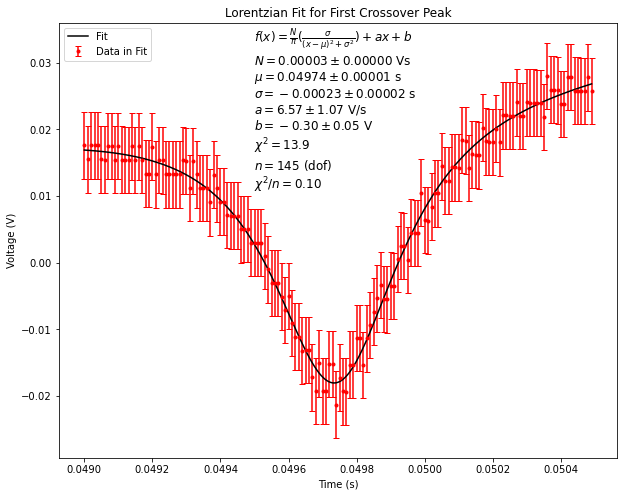

In [29]:
import pandas as pd
data = x,sub
min_value=750
max_value=900
print(min_value)
print(max_value)
dsub = 0.005

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0,np.zeros_like(p0),-1,-1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf),-1,-1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(abs(np.diagonal(cov))) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof


time2=x[min_value:max_value]
sub2=sub[min_value:max_value]

def lorentzianfunc(p,x):
    return (p[0]/sc.pi)*(p[2]/(((x-p[1])**2)+p[2]**2))+p[3]*x+p[4]

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

print("Lorentzian Fit")
p0=[1.,0.0497,-.1,0.1,.1]

pf1,pferr1,chisq1,dof1=data_fit(p0,lorentzianfunc,time2,sub2,dsub)

fig,ax=plt.subplots(figsize=(10,8))
ax.errorbar(time2,sub2,yerr=dsub,fmt='r.',label='Data in Fit',capsize=3)
time_cont=np.linspace(min(time2),max(time2),5000)
ax.plot(time_cont,lorentzianfunc(pf1,time_cont),'k-',label='Fit')

textfit=r'$f(x) = \frac{N}{\pi}(\frac{\sigma}{(x-\mu)^2+\sigma^2})+ax+b$'+'\n'

textfit=r'$f(x) = \frac{N}{\pi}(\frac{\sigma}{(x-\mu)^2+\sigma^2})+ax+b$'+'\n'
textfit+='$N={:.5f}\pm{:.5f}$ Vs\n'.format(pf1[0],pferr1[0])
textfit+='$\mu={:.5f}\pm{:.5f}$ s\n'.format(pf1[1],pferr1[1])
textfit+='$\sigma={:.5f}\pm{:.5f}$ s\n'.format(pf1[2],pferr1[2])
textfit+='$a={:.2f}\pm{:.2f}$ V/s\n'.format(pf1[3],pferr1[3])
textfit+='$b={:.2f}\pm{:.2f}$ V\n'.format(pf1[4],pferr1[4])
textfit += '$\chi^2= {:.1f}$ \n'.format(chisq1) 
textfit += '$n = {}$ (dof) \n'.format(dof1) 
textfit += '$\chi^2/n = {:.2f}$'.format(chisq1/dof1)

ax.text(0.35,0.99,textfit,transform=ax.transAxes,fontsize=12,verticalalignment='top')
ax.set_title("Lorentzian Fit for First Crossover Peak")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.legend()


950
1050
Lorentzian Fit

Converged with chi-squared 10.00
Number of degrees of freedom, dof = 95.00
Reduced chi-squared 0.11

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 2.370e-05                | 3.789e-06               
1           | 4.970e-02                | 5.147e-02                | 9.588e-06               
2           | -1.000e-01               | -2.134e-04               | 2.554e-05               
3           | 1.000e-01                | -1.826e+01               | 2.267e+00               
4           | 1.000e-01                | 9.573e-01                | 1.172e-01               


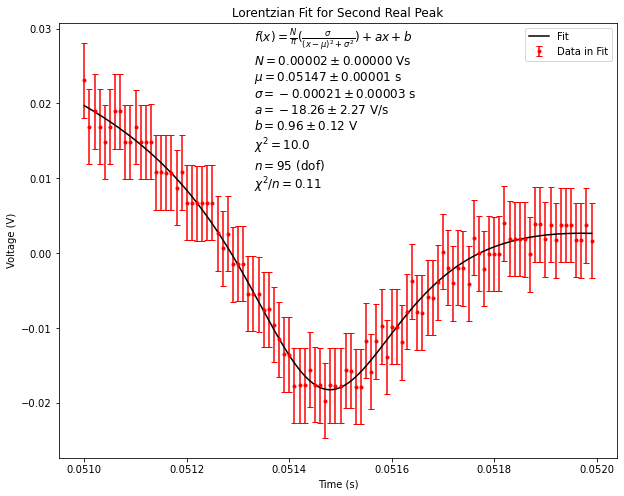

In [28]:
data = x,sub
min_value=950
max_value=1050
print(min_value)
print(max_value)
dsub = 0.005

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0,np.zeros_like(p0),-1,-1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf),-1,-1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(abs(np.diagonal(cov))) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof


time2=x[min_value:max_value]
sub2=sub[min_value:max_value]

def lorentzianfunc(p,x):
    return (p[0]/sc.pi)*(p[2]/(((x-p[1])**2)+p[2]**2))+p[3]*x+p[4]

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

print("Lorentzian Fit")
p0=[1.,0.0497,-.1,0.1,.1]

pf1,pferr1,chisq1,dof1=data_fit(p0,lorentzianfunc,time2,sub2,dsub)

fig,ax=plt.subplots(figsize=(10,8))
ax.errorbar(time2,sub2,yerr=dsub,fmt='r.',label='Data in Fit',capsize=3)
time_cont=np.linspace(min(time2),max(time2),5000)
ax.plot(time_cont,lorentzianfunc(pf1,time_cont),'k-',label='Fit')

textfit=r'$f(x) = \frac{N}{\pi}(\frac{\sigma}{(x-\mu)^2+\sigma^2})+ax+b$'+'\n'
textfit+='$N={:.5f}\pm{:.5f}$ Vs\n'.format(pf1[0],pferr1[0])
textfit+='$\mu={:.5f}\pm{:.5f}$ s\n'.format(pf1[1],pferr1[1])
textfit+='$\sigma={:.5f}\pm{:.5f}$ s\n'.format(pf1[2],pferr1[2])
textfit+='$a={:.2f}\pm{:.2f}$ V/s\n'.format(pf1[3],pferr1[3])
textfit+='$b={:.2f}\pm{:.2f}$ V\n'.format(pf1[4],pferr1[4])
textfit += '$\chi^2= {:.1f}$ \n'.format(chisq1) 
textfit += '$n = {}$ (dof) \n'.format(dof1) 
textfit += '$\chi^2/n = {:.2f}$'.format(chisq1/dof1)


ax.text(0.35,0.99,textfit,transform=ax.transAxes,fontsize=12,verticalalignment='top')
ax.set_title("Lorentzian Fit for Second Real Peak")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.legend()

1090
1190
Lorentzian Fit

Converged with chi-squared 25.55
Number of degrees of freedom, dof = 95.00
Reduced chi-squared 0.27

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 6.598e-05                | 3.208e-06               
1           | 4.970e-02                | 5.281e-02                | 2.783e-06               
2           | -1.000e-01               | -1.896e-04               | 7.100e-06               
3           | 1.000e-01                | -2.221e+01               | 2.428e+00               
4           | 1.000e-01                | 1.175e+00                | 1.294e-01               


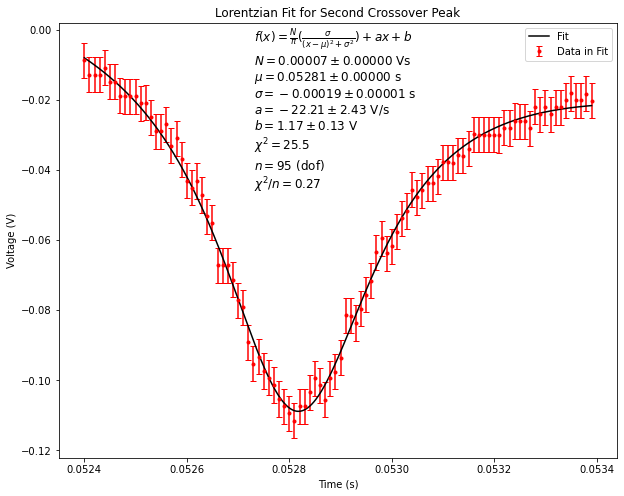

In [27]:
data = x,sub
min_value=1090
max_value=1190
print(min_value)
print(max_value)
dsub = 0.005

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0,np.zeros_like(p0),-1,-1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf),-1,-1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(abs(np.diagonal(cov))) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof


time2=x[min_value:max_value]
sub2=sub[min_value:max_value]

def lorentzianfunc(p,x):
    return (p[0]/sc.pi)*(p[2]/(((x-p[1])**2)+p[2]**2))+p[3]*x+p[4]

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

print("Lorentzian Fit")
p0=[1.,0.0497,-.1,0.1,.1]

pf1,pferr1,chisq1,dof1=data_fit(p0,lorentzianfunc,time2,sub2,dsub)

fig,ax=plt.subplots(figsize=(10,8))
ax.errorbar(time2,sub2,yerr=dsub,fmt='r.',label='Data in Fit',capsize=3)
time_cont=np.linspace(min(time2),max(time2),5000)
ax.plot(time_cont,lorentzianfunc(pf1,time_cont),'k-',label='Fit')

textfit=r'$f(x) = \frac{N}{\pi}(\frac{\sigma}{(x-\mu)^2+\sigma^2})+ax+b$'+'\n'
textfit+='$N={:.5f}\pm{:.5f}$ Vs\n'.format(pf1[0],pferr1[0])
textfit+='$\mu={:.5f}\pm{:.5f}$ s\n'.format(pf1[1],pferr1[1])
textfit+='$\sigma={:.5f}\pm{:.5f}$ s\n'.format(pf1[2],pferr1[2])
textfit+='$a={:.2f}\pm{:.2f}$ V/s\n'.format(pf1[3],pferr1[3])
textfit+='$b={:.2f}\pm{:.2f}$ V\n'.format(pf1[4],pferr1[4])
textfit += '$\chi^2= {:.1f}$ \n'.format(chisq1) 
textfit += '$n = {}$ (dof) \n'.format(dof1) 
textfit += '$\chi^2/n = {:.2f}$'.format(chisq1/dof1)


ax.text(0.35,0.99,textfit,transform=ax.transAxes,fontsize=12,verticalalignment='top')
ax.set_title("Lorentzian Fit for Second Crossover Peak")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.legend()

1230
1390
Lorentzian Fit

Converged with chi-squared 61.16
Number of degrees of freedom, dof = 155.00
Reduced chi-squared 0.39

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 1.951e-04                | 3.383e-06               
1           | 4.970e-02                | 5.459e-02                | 1.669e-06               
2           | -1.000e-01               | -2.869e-04               | 4.076e-06               
3           | 1.000e-01                | -6.571e+00               | 1.018e+00               
4           | 1.000e-01                | 3.560e-01                | 5.564e-02               


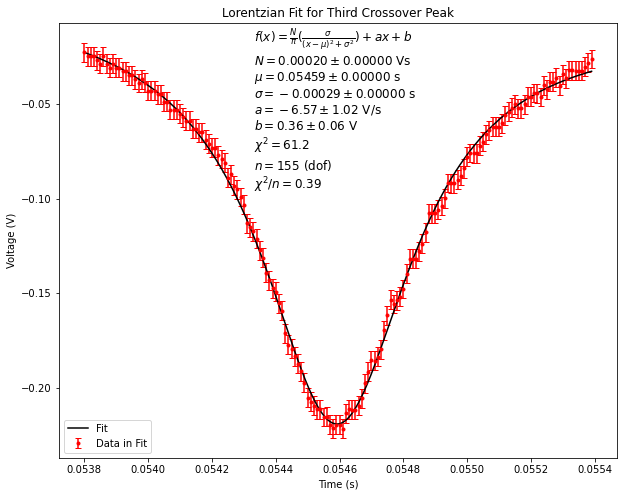

In [31]:
data = x,sub
min_value=1230
max_value=1390
print(min_value)
print(max_value)
dsub = 0.005

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0,np.zeros_like(p0),-1,-1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf),-1,-1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(abs(np.diagonal(cov))) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof


time2=x[min_value:max_value]
sub2=sub[min_value:max_value]

def lorentzianfunc(p,x):
    return (p[0]/sc.pi)*(p[2]/(((x-p[1])**2)+p[2]**2))+p[3]*x+p[4]

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

print("Lorentzian Fit")
p0=[1.,0.0497,-.1,0.1,.1]

pf1,pferr1,chisq1,dof1=data_fit(p0,lorentzianfunc,time2,sub2,dsub)

fig,ax=plt.subplots(figsize=(10,8))
ax.errorbar(time2,sub2,yerr=dsub,fmt='r.',label='Data in Fit',capsize=3)
time_cont=np.linspace(min(time2),max(time2),5000)
ax.plot(time_cont,lorentzianfunc(pf1,time_cont),'k-',label='Fit')

textfit=r'$f(x) = \frac{N}{\pi}(\frac{\sigma}{(x-\mu)^2+\sigma^2})+ax+b$'+'\n'
textfit+='$N={:.5f}\pm{:.5f}$ Vs\n'.format(pf1[0],pferr1[0])
textfit+='$\mu={:.5f}\pm{:.5f}$ s\n'.format(pf1[1],pferr1[1])
textfit+='$\sigma={:.5f}\pm{:.5f}$ s\n'.format(pf1[2],pferr1[2])
textfit+='$a={:.2f}\pm{:.2f}$ V/s\n'.format(pf1[3],pferr1[3])
textfit+='$b={:.2f}\pm{:.2f}$ V\n'.format(pf1[4],pferr1[4])
textfit += '$\chi^2= {:.1f}$ \n'.format(chisq1) 
textfit += '$n = {}$ (dof) \n'.format(dof1) 
textfit += '$\chi^2/n = {:.2f}$'.format(chisq1/dof1)


ax.text(0.35,0.99,textfit,transform=ax.transAxes,fontsize=12,verticalalignment='top')
ax.set_title("Lorentzian Fit for Third Crossover Peak")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.legend()

1580
1680
Lorentzian Fit

Converged with chi-squared 20.66
Number of degrees of freedom, dof = 95.00
Reduced chi-squared 0.22

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 6.321e-05                | 3.604e-06               
1           | 4.970e-02                | 5.778e-02                | 3.435e-06               
2           | -1.000e-01               | -2.090e-04               | 9.046e-06               
3           | 1.000e-01                | -1.136e+01               | 2.212e+00               
4           | 1.000e-01                | 6.359e-01                | 1.281e-01               


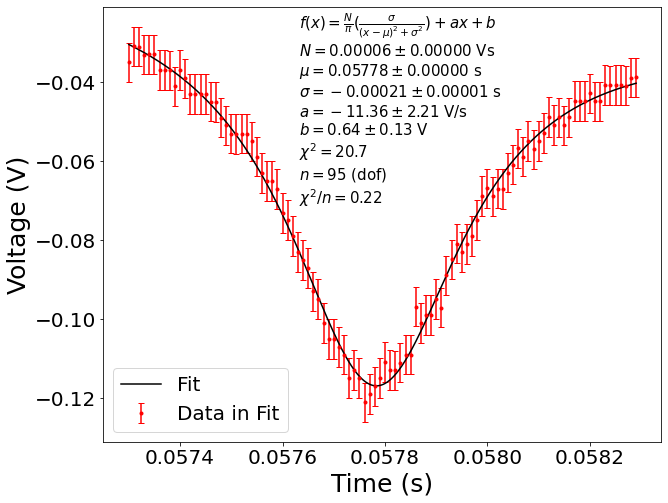

In [36]:
data = x,sub
min_value=1580
max_value=1680
print(min_value)
print(max_value)
dsub = 0.005

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0,np.zeros_like(p0),-1,-1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf),-1,-1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(abs(np.diagonal(cov))) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof


time2=x[min_value:max_value]
sub2=sub[min_value:max_value]

def lorentzianfunc(p,x):
    return (p[0]/sc.pi)*(p[2]/(((x-p[1])**2)+p[2]**2))+p[3]*x+p[4]

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

print("Lorentzian Fit")
p0=[1.,0.0497,-.1,0.1,.1]

pf1,pferr1,chisq1,dof1=data_fit(p0,lorentzianfunc,time2,sub2,dsub)

fig,ax=plt.subplots(figsize=(10,8))
ax.errorbar(time2,sub2,yerr=dsub,fmt='r.',label='Data in Fit',capsize=3)
time_cont=np.linspace(min(time2),max(time2),5000)
ax.plot(time_cont,lorentzianfunc(pf1,time_cont),'k-',label='Fit')

textfit=r'$f(x) = \frac{N}{\pi}(\frac{\sigma}{(x-\mu)^2+\sigma^2})+ax+b$'+'\n'
textfit+='$N={:.5f}\pm{:.5f}$ Vs\n'.format(pf1[0],pferr1[0])
textfit+='$\mu={:.5f}\pm{:.5f}$ s\n'.format(pf1[1],pferr1[1])
textfit+='$\sigma={:.5f}\pm{:.5f}$ s\n'.format(pf1[2],pferr1[2])
textfit+='$a={:.2f}\pm{:.2f}$ V/s\n'.format(pf1[3],pferr1[3])
textfit+='$b={:.2f}\pm{:.2f}$ V\n'.format(pf1[4],pferr1[4])
textfit += '$\chi^2= {:.1f}$ \n'.format(chisq1) 
textfit += '$n = {}$ (dof) \n'.format(dof1) 
textfit += '$\chi^2/n = {:.2f}$'.format(chisq1/dof1)


ax.text(0.35,0.99,textfit,transform=ax.transAxes,fontsize=15,verticalalignment='top')
ax.set_xlabel("Time (s)",fontsize=25)
ax.set_ylabel("Voltage (V)",fontsize=25)
ax.legend(prop={"size":20})

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

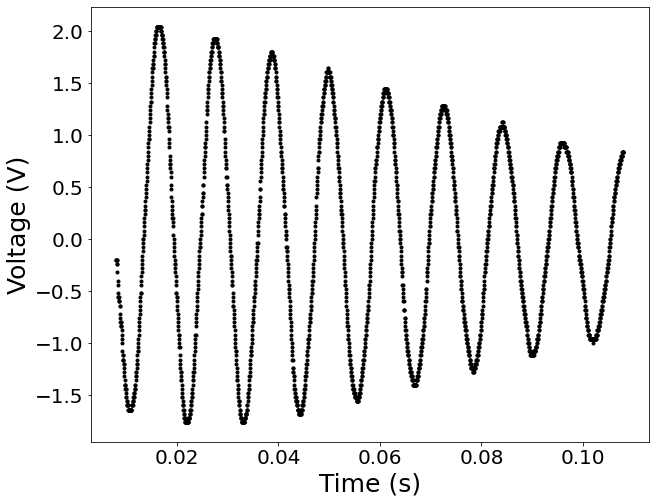

In [31]:
data_filename ='Michelson.txt'
a, b= np.loadtxt(data_filename, unpack=True, skiprows=1)
fig, ax = plt.subplots(figsize = (10,8))
ax.errorbar(a,b,fmt='k.')
ax.set_xlabel('Time (s)',fontsize=25)
ax.set_ylabel('Voltage (V)',fontsize=25)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

In [263]:
avgdt=((0.0164-0.0275)+(0.0275-0.0386)+(0.0386-0.0497)+(0.0497-0.061)+(0.061-0.0725)+(0.0725-0.0845)+(0.0845-0.0959))/-7
davgdt=7*0.001

df=sc.c/(2*(.444-.127))
ddf=-(sc.c/(2*(.446-.125)))+(sc.c/(2*(.442-.129)))
print(davgdt/avgdt)
m=df/avgdt
dm=ddf/davgdt
print(df)
print(ddf)
print(m)
print(dm)

0.6163522012578617
472858766.5615142
11935244.612980604
41635363093.46667
1705034944.711515


In [260]:
T1to2=5.147e-02-4.786e-02
f12=T1to2*m
print(T1to2)
print("Δν =",f12)
print("E(1-2) =",f12*sc.h/sc.e)

T2to3=5.778e-02-5.147e-02
f23=T2to3*m
print(T2to3)
print("Δν =",f23)
print("E(2-3) =",f23*sc.h/sc.e)

T1to3=5.778e-02-4.786e-02
f13=T1to3*m
print(T1to3)
print("Δν =",f13)
print("E(1-3) =",f13*sc.h/sc.e)

0.003610000000000002
Δν = 150303660.76741475
E(1-2) = 6.216059945651992e-07
0.006309999999999996
Δν = 262719141.11977452
E(2-3) = 1.0865190652926322e-06
0.009919999999999998
Δν = 413022801.88718927
E(1-3) = 1.7081250598578313e-06
